In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax.flatten_util import ravel_pytree
import jax
import jax.numpy as jnp
from jax import vmap, jit
import jax.numpy as jnp
from pathlib import Path
import numpy as np
from einops import rearrange
import jax
import matplotlib.pyplot as plt
import seaborn as sns
from jax import grad, jacfwd, jacrev, jit, jvp, vmap

In [3]:
import hydra

import hflow.io.result as R
from hflow.config import Config
from hflow.data.get import get_data
from hflow.io.save import save_results
from hflow.io.setup import setup
from hflow.net.get import get_network
from hflow.test.test import test_model
from hflow.train.loss import get_loss_fn
from hflow.train.sample import get_arg_fn
from hflow.train.train import train_model






In [4]:
from hflow.config import lin_config
cfg = lin_config

In [ ]:
cfg.x64 = False
cfg.loss.alpha_quant = 'p'
cfg.loss.alpha = 0.5 
cfg.test.plot_particles = False
cfg.test.plot_particles = False
cfg.test.wass = False
cfg.test.analytic = False

In [18]:
from hflow.run import build
key, train_data, test_data, loss_fn, arg_fn, s_fn, params_init = build(cfg)



#


In [7]:
opt_params, param_history = train_model(
    cfg.optimizer, arg_fn, loss_fn, params_init, key)

adam:   0%|          | 0/10000 [00:00<?, ?it/s]

2024-11-20 12:39:40.064983: W external/xla/xla/service/gpu/autotuning/gemm_fusion_autotuner.cc:1061] Compiling 530 configs for 24 fusions on a single thread.


In [20]:
test_sol = test_model(cfg, test_data, s_fn, opt_params, key)

In [22]:
test_sol.shape

(128, 10000, 2)

In [23]:
from hflow.misc.plot import scatter_movie


scatter_movie(test_sol)

NameError: name 'HTML' is not defined

In [12]:


h_flat = []
m_flat = []
for hyper_params, main_params in param_history:
    hf, mf = ravel_pytree(hyper_params)[0], ravel_pytree(main_params)[0]
    h_flat.append(hf)
    m_flat.append(mf)

h_flat = jnp.asarray(h_flat)
m_flat = jnp.asarray(m_flat)

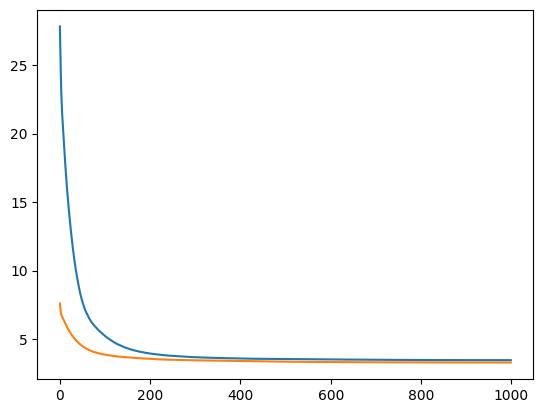

In [13]:
m_norm = jnp.linalg.norm(m_flat, axis=-1)
h_norm = jnp.linalg.norm(h_flat, axis=-1)

plt.plot(m_norm)
plt.plot(h_norm)
plt.show()

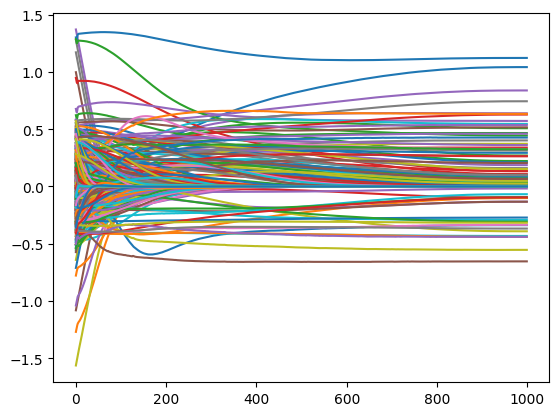

In [14]:
plt.plot(h_flat)
plt.show()

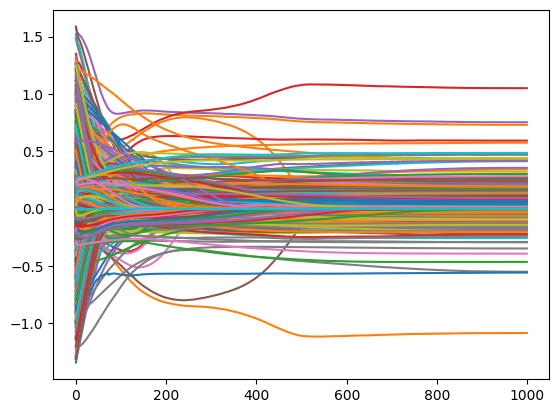

In [15]:
plt.plot(m_flat)
plt.show()